In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os
import sys

# Get the current notebook's directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))

# Add the parent directory to the module search path
sys.path.insert(0, parent_directory)
print(parent_directory)

/n/holylabs/LABS/mzitnik_lab/Users/afang/GET


In [3]:
import importlib
import data.dataset
importlib.reload(data.dataset)
from data.dataset import PDBDataset


/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get PDB files
Using InterPro IDs: IPR001680 IPR036322 IPR015943 as the search query, a list of 349 WDR domain proteins and  the number of publications and the number of articles associating each protein with specific disease areas were sourced from chembioport.thesgc.org.

In [5]:
proteins = pd.read_csv('wdr_proteins_pdb.txt', sep='\t', header=1)

In [6]:
pdb_ids = []
for x in proteins['structure list'].to_list():
    if not pd.isna(x):
        pdb_ids.extend(x.split(','))
pdb_ids = list(set(pdb_ids))
len(pdb_ids)

1679

In [7]:
with open('wdr_pdb_ids.txt', 'w') as f:
    f.write(','.join(pdb_ids))

In [8]:
pdb_files = os.listdir('pdb_files')

# Identify WDR domain from the PDB files

In [6]:
from Bio.PDB import PDBParser
from Bio import pairwise2
from Bio.SeqUtils import seq1
from tqdm import tqdm

In [19]:
output_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/tm_align_results"
output = []
for res_file in os.listdir(output_dir):
    with open(os.path.join(output_dir, res_file), 'r') as f:
        results = f.read()
    results = results.split(",")
    pdb_id, chain = res_file.split(".")[0].split("_")[0], res_file.split(".")[0].split("_")[1]
    output.append([pdb_id, chain, float(results[0]), float(results[1])])
    

In [23]:
df_seq_alignments = pd.DataFrame(output, columns=['pdb_id', 'chain', 'TM_score_reference', 'TM_score_target'])
df_seq_alignments.to_csv('wdr_proteins_tm_alignments.csv', index=False)

In [22]:
df_seq_alignments

,pdb_file,chain,TM_score_reference,TM_score_target
0,4KZY,b,0.121209,0.305573
1,5HYN,B,0.906046,0.761821
2,6EG8,B,0.902678,0.809552
3,6ICZ,k,0.141689,0.351843
4,3JCR,6,0.127761,0.390305
...,...,...,...,...
8823,6VBU,8,0.315663,0.230093
8824,6NBI,G,0.091964,0.286435
8825,6K41,G,0.092002,0.279524
8826,6WZG,A,0.254760,0.298601


(array([ 315., 1449., 1959., 1257., 1101.,  662.,  192.,    5.,    3.,
           2.,    5.,   37.,    7.,   34.,  204.,  234.,  315.,  622.,
         209.,  216.]),
 array([0.04642662, 0.09410529, 0.14178396, 0.18946262, 0.23714129,
        0.28481996, 0.33249863, 0.3801773 , 0.42785597, 0.47553464,
        0.52321331, 0.57089198, 0.61857065, 0.66624932, 0.71392799,
        0.76160665, 0.80928532, 0.85696399, 0.90464266, 0.95232133,
        1.        ]),
 <BarContainer object of 20 artists>)

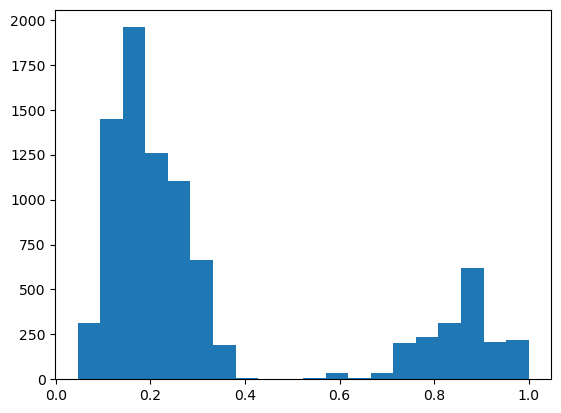

In [16]:
plt.hist(df_seq_alignments['similarity_reference'].astype(float), bins=20)

In [18]:
df_seq_alignments[df_seq_alignments['similarity_reference'] > 0.8]

,pdb_file,chain,similarity_reference,similarity_target,pdb_id
1,5HYN,B,0.906046,0.761821,5HYN
2,6EG8,B,0.902678,0.809552,6EG8
9,3JBT,K,0.879908,0.247815,3JBT
18,8J6S,L,0.837296,0.842382,8J6S
19,1XHM,A,0.901870,0.813429,1XHM
...,...,...,...,...,...
8794,7Y5O,F,0.888412,0.677994,7Y5O
8797,5UKM,B,0.907225,0.817753,5UKM
8811,3JB9,L,0.910239,0.943041,3JB9
8817,5WVE,M,0.879905,0.247815,5WVE


In [53]:
df_seq_alignments.to_csv('wdr_pdb_chain_similarities.csv', index=False, columns=['pdb_id', 'chain', 'similarity'])

<Axes: >

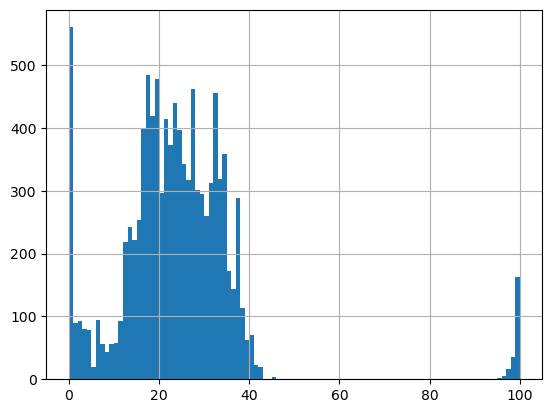

In [55]:
df_seq_alignments['similarity'].hist(bins=100)

In [56]:
(df_seq_alignments['similarity'] > 80).sum()

224

# Analyze the interfaces

In [22]:
import numpy as np
from umap import UMAP
import pandas as pd

with open("embeddings2/graph_embeddings.npy", "rb") as f:
    embeddings = np.load(f)
with open("embeddings2/graph_id.txt", "r") as f:
    graph_id = f.read().split("\n")[:-1]

n_neighbors = 20
min_dist = 0.1
umap_2d = UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    init="random",
    random_state=0,
)
proj_2d_graph = umap_2d.fit_transform(embeddings)
df = pd.DataFrame(columns=["x", "y"])
df["x"] = proj_2d_graph[:, 0]
df["y"] = proj_2d_graph[:, 1]
df["graph_id"] = graph_id

len(df)

/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



4595

In [47]:
chosen_pdb = "5HYN_B"
chosen_pdb = "8UWP"
chosen_df = df[df["graph_id"].str.contains(chosen_pdb)]
chosen_df

,x,y,graph_id


In [61]:
dataset = PDBDataset('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/wdr_interfaces2.pkl')
unique_points = []
for idx in dataset.indexes:
    split_idx = idx.split('_')
    if len(split_idx) > 3: # interaction with ligand
        unique_points.append(idx)
    else:
        pdb_id, ch1, ch2 = split_idx
        if f"{pdb_id}_{ch2}_{ch1}" in unique_points:
            continue
        else: 
            unique_points.append(idx)

In [62]:
len(unique_points)

4231

In [3]:
extra_labels = {
    '4QL1_B_B_401_35Q': 'ligand_in_central_pocket',
    '4QL1_B_A': 'PPI',
    '5K0M_A_A_501_6PU': 'ligand_in_central_pocket',
    '6M91_A_A_601_J97': 'ligand_in_central_pocket',
    '6M91_A_C': 'peptide_in_central_pocket',
    '6M91_A_B': 'PPI',
    '4N14_A_A_501_WR7': 'ligand_on_outer_surface',
    '8T5I_A_A_401_ZHF': 'ligand_in_central_pocket',
    '8T5I_A_B': 'PPI',
    '2O9K_A_B': 'peptide_in_central_pocket', # note this peptide has a modified residue, which is not handled properly in the data processing
    '8SHJ_A_A_801_ZI8': 'ligand_on_outer_surface',
    '8SHJ_C_A': 'PPI',
    '8SHJ_B_A': 'PPI',
    '8SHJ_A_B': 'PPI',
    '8SHJ_A_C': 'PPI',
    '8SHJ_C_B': 'PPI',
    '8SHJ_B_C': 'PPI',
}

# missing because of too low TM score
# 7UFV, 8F8E, 8OO5, 7SSE

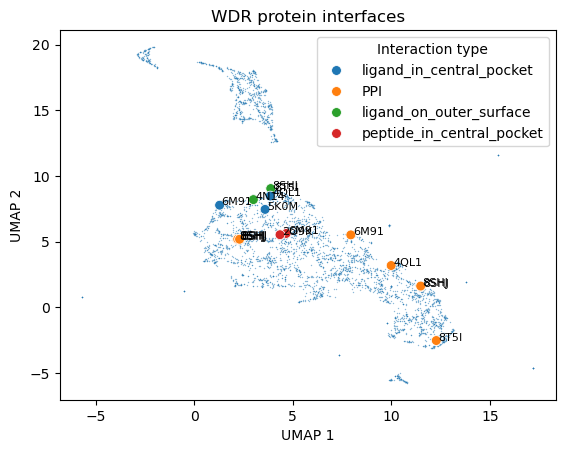

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data=df, x="x", y="y", alpha=0.5, s=1)
chosen_df = df[df["graph_id"].isin(extra_labels.keys())]
sns.scatterplot(data=chosen_df, x="x", y="y", alpha=1, s=50, hue=chosen_df["graph_id"].map(extra_labels))
plt.legend(title='Interaction type')
for i in range(len(chosen_df['x'])):
    plt.text(chosen_df['x'].iloc[i] + 0.1,  # X position, with a slight offset to avoid overlapping the point
             chosen_df['y'].iloc[i],       # Y position
             chosen_df["graph_id"].iloc[i].split("_")[0],  # Text label
             fontsize=8)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("WDR protein interfaces")
plt.savefig('wdr_protein_interfaces_umap.png', dpi=300)
# plt.show()


In [8]:
import plotly.express as px

px.scatter(df, x="x", y="y", hover_name=df["graph_id"], title="WDR protein interfaces")
px.scatter(chosen_df, x="x", y="y", hover_name=chosen_df["graph_id"].map(extra_labels), 
           title="WDR protein interfaces", color=chosen_df["graph_id"].map(extra_labels))

In [33]:
import plotly.graph_objects as go


# Add a column to indicate the presence of a ligand
df['has_ligand'] = df['graph_id'].apply(lambda x: len(x.split("_")) > 3)

# Create figure
fig = go.Figure()

# Add trace for points WITH ligand
fig.add_trace(go.Scatter(
    x=df[df['has_ligand']]['x'],
    y=df[df['has_ligand']]['y'],
    mode='markers',
    marker=dict(size=5, color='pink'),  # Specific color for with ligand
    text=df[df['has_ligand']]['graph_id'],  # hover text
    name='With Ligand'  # Name for legend
))

# Add trace for points WITHOUT ligand
fig.add_trace(go.Scatter(
    x=df[~df['has_ligand']]['x'],
    y=df[~df['has_ligand']]['y'],
    mode='markers',
    marker=dict(size=5, color='#2596be'),  # Specific color for without ligand
    text=df[~df['has_ligand']]['graph_id'],  # hover text
    name='Without Ligand'  # Name for legend
))

# Prepare color mapping for the second scatter plot, if necessary
# Assuming 'extra_labels' is a dictionary mapping 'graph_id' to labels
colors = chosen_df['graph_id'].map(extra_labels).astype('category').cat.codes  # This is one way to convert labels to numerical codes

# Add each group from chosen_df as a separate trace
for label, group in chosen_df.groupby(chosen_df['graph_id'].map(extra_labels)):
    fig.add_trace(go.Scatter(
        x=group['x'],
        y=group['y'],
        mode='markers',
        marker=dict(size=10),
        text=group['graph_id'],  # hover text
        name=label  # Use the mapped label for the legend
    ))

# Update layout with title and possibly other options
fig.update_layout(
    title='WDR Protein Interfaces',
    xaxis_title='x',
    yaxis_title='y',
    legend_title="Groups"
)

# Update layout with title and possibly other options
fig.update_layout(title='WDR Protein Interfaces with Ligands', xaxis_title='x', yaxis_title='y')
fig.write_html("WDR_Protein_Interfaces_with_ligands.html")
# Show figure

fig.show()

In [15]:
[gid for gid in graph_id if chosen_pdb in gid]

['5HYN_B_E_7_M3L', '5HYN_B_A', '5HYN_B_C', '5HYN_B_E']

Number of embeddings 4595


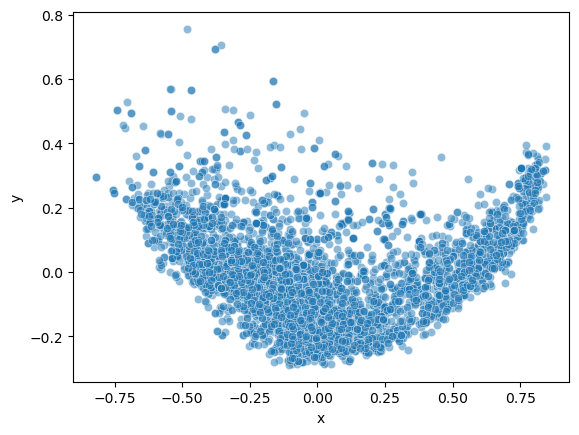

In [4]:
# plot PCAs of the embeddings
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj_2d_graph_pca = pca.fit_transform(embeddings)
df_pca = pd.DataFrame(columns=["x", "y"])
df_pca["x"] = proj_2d_graph_pca[:, 0]
df_pca["y"] = proj_2d_graph_pca[:, 1]
print("Number of embeddings", len(embeddings))
sns.scatterplot(data=df_pca, x="x", y="y", alpha=0.5)
plt.show()